# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [65]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get the duplicate Mouse IDs
duplicate_ids = duplicates["Mouse ID"].unique()
duplicate_ids


array(['g989'], dtype=object)

In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
count_clean_df = clean_data["Mouse ID"].count() 
count_clean_df

1888

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_groups = clean_data.groupby("Drug Regimen")
summary_table = drug_groups.agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],
    "Weight (g)": ["mean"]
})

# Assemble the resulting series into a single summary DataFrame.

summary_table = summary_table.reset_index()
summary_table.columns = ["Drug Regimen", "Mean Tumor Volume (mm3)", "Median Tumor Volume (mm3)", "Variance of Tumor Volume (mm3)", "Std. Deviation of Tumor Volume (mm3)", "SEM of Tumor Volume (mm3)", "Mean Weight (g)"]

# Print the summary table
summary_table



,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Std. Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3),Mean Weight (g)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,19.965217
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,27.398876
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,27.196629
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,27.861702
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,27.166667
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,27.928177
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862,27.076923
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,19.679825
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,27.856354
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398,27.692308


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Group the data by drug regimen
regimen_grouped = clean_data.groupby('Drug Regimen')

# Calculate the summary statistics for tumor volume
summary_df = regimen_grouped.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename the columns
summary_df.columns = ['Mean Tumor Volume (mm3)', 'Median Tumor Volume (mm3)', 'Variance of Tumor Volume (mm3)', 'Std. Deviation of Tumor Volume (mm3)', 'SEM of Tumor Volume (mm3)']


# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

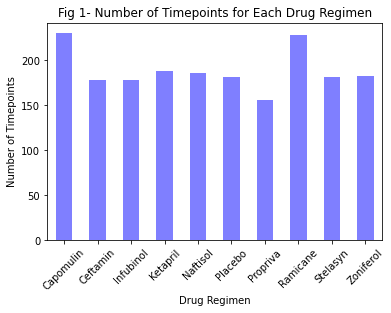

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Use groupby to count the number of timepoints for each drug regimen
counts = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot using Pandas
counts.plot(kind='bar', rot=45, color='blue', alpha=0.5, align="center", width=0.5)

# Set the chart title and axis labels
plt.title('Fig 1- Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Display the chart
plt.show()


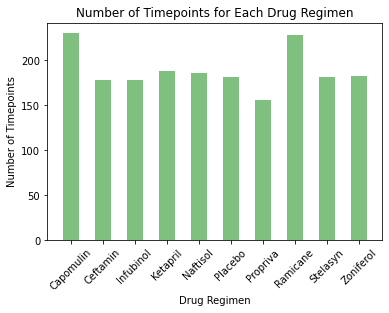

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Use groupby to count the number of timepoints for each drug regimen
counts = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot using Pyplot
plt.bar(counts.index, counts.values, color='green', alpha=0.5, align="center", width=0.5)

# Set the chart title and axis labels
plt.title('Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()



Male      958
Female    930
Name: Sex, dtype: int64


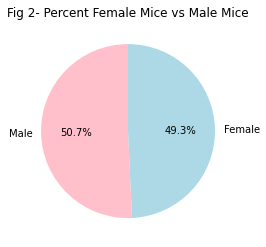

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Use value_counts() to count the number of female and male mice
counts = clean_data['Sex'].value_counts()

# Create a pie plot using Pyplot
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])

# Set the chart title
plt.title('Fig 2- Percent Female Mice vs Male Mice')

#show counts
print(counts)

# Display the chart
plt.show()


## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last timepoints back into the original dataframe to get the final tumor volume
final_tumor_volume = pd.merge(clean_data, last_timepoints, on=['Mouse ID', 'Timepoint'])

# Filter the dataframe to only include the four treatment regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatments)]

# Select only the columns needed for the analysis
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Group the cleaned data by 'Mouse ID' and 'Drug Regimen' and get the maximum 'Timepoint' and corresponding 'Tumor Volume (mm3)'
last_timepoint_df = clean_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint', 'Tumor Volume (mm3)'].max()

# Rename the 'Tumor Volume (mm3)' column to 'Final Tumor Volume (mm3)'
last_timepoint_df = last_timepoint_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})

# Merge the last_timepoint_df with the original cleaned data to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data, last_timepoint_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'])

# Print the resulting dataframe
merged_df.head()



c:\Users\15127\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126,1,45.000000
1,s185,Capomulin,Female,3,17,45,23.343598,1,45.000000
2,x401,Capomulin,Female,16,15,45,28.484033,0,45.473753
3,m601,Capomulin,Male,22,17,45,28.430964,1,45.000000
4,g791,Ramicane,Male,11,16,45,29.128472,1,45.851531


In [74]:
 # Locate the rows which contain mice on each drug and get the tumor volumes

# Create a dictionary to store the tumor volumes for each drug
tumor_volumes = {}

# Loop through each drug regimen to obtain tumor volumes
for drug in merged_df["Drug Regimen"].unique():
    # Locate the rows which contain mice on the current drug
    mask = merged_df["Drug Regimen"] == drug
    # Get the tumor volumes for the selected rows
    volumes = merged_df.loc[mask, "Final Tumor Volume (mm3)"]
    # Add the tumor volumes to the dictionary
    tumor_volumes[drug] = volumes 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
import numpy as np

    # Loop through each drug 
for drug, volumes in tumor_volumes.items():  # Calculate the IQR for the current drug
    q1, q3 = np.percentile(volumes, [25, 75])
    iqr = q3 - q1

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify potential outliers using the bounds
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

     # Print the results for the current drug regimen
    print(f"Drug regimen: {drug}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Potential outliers: {outliers}\n")
 
       

Drug regimen: Ramicane
IQR: 1.34
Lower bound: 42.98
Upper bound: 48.36
Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Drug regimen: Capomulin
IQR: 1.75
Lower bound: 42.38
Upper bound: 49.37
Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Drug regimen: Infubinol
IQR: 11.48
Lower bound: 36.83
Upper bound: 82.74
Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Drug regimen: Placebo
IQR: 15.19
Lower bound: 30.16
Upper bound: 90.92
Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Drug regimen: Ceftamin
IQR: 15.58
Lower bound: 25.36
Upper bound: 87.67
Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Drug regimen: Stelasyn
IQR: 16.63
Lower bound: 27.54
Upper bound: 94.04
Potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)

Drug regimen: Zoniferol
IQR: 16.81
Lower bound: 24.78
Upper bound: 92.00
Potential outlie

c:\Users\15127\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


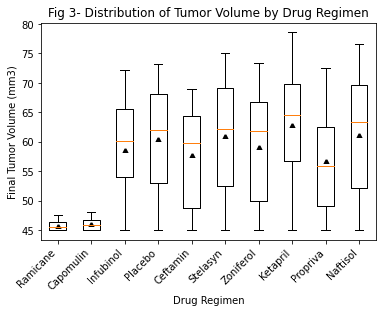

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a list of tumor volumes for each drug regimen
vol_data = list(tumor_volumes.values())

# Calculate the mean tumor volume for each drug regimen
vol_mean = [np.mean(volumes) for volumes in tumor_volumes.values()]

# Create a list of drug regimen names
labels = list(tumor_volumes.keys())

# Create the box plot
plt.boxplot(vol_data, labels=labels)

# Add markers for the mean tumor volume
for i, mean in enumerate(vol_mean):
    plt.plot(i+1, mean, marker='^', markersize=3, markeredgewidth=2, markerfacecolor='w', color='black')

# Add labels and a title
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Fig 3- Distribution of Tumor Volume by Drug Regimen")

# Rotate the x-axis tick labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


## Line and Scatter Plots

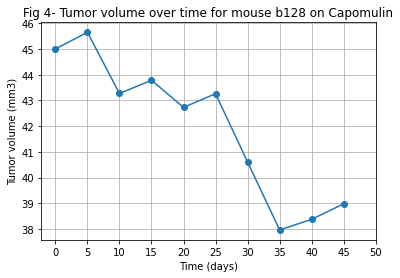

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

import pandas as pd
import matplotlib.pyplot as plt

# # Capture data for the Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Select a mouse ID to plot
selected_mouse = capomulin_data[capomulin_data["Mouse ID"] == "b128"]

# Filter the grouped data for the selected mouse ID
# Group the capomulin data by mouse ID
capomulin_groups = capomulin_data.groupby("Mouse ID")

# Get the group for the selected mouse
selected_mouse_group = capomulin_groups.get_group("b128")

# plot the data for the selected mouse
plt.plot(selected_mouse_group["Timepoint"], selected_mouse_group["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Time (days)")
# Customize the tick locations and labels
plt.xticks(range(0, 51, 5)) 
# Add a grid
plt.grid(True)
plt.ylabel("Tumor volume (mm3)")
plt.title("Fig 4- Tumor volume over time for mouse b128 on Capomulin")
plt.show()

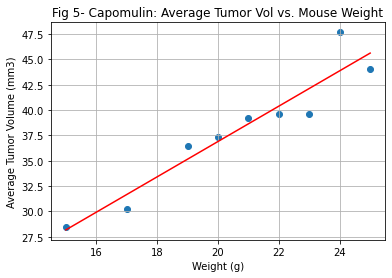

In [77]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = merged_df[merged_df["Drug Regimen"] == "Capomulin"]

# Group the data by mouse weight and calculate the mean tumor volume
weight_vs_tumor = capomulin_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# Create a scatter plot of the data
plt.scatter(weight_vs_tumor.index, weight_vs_tumor.values)

# Calculate the linear regression line
slope, intercept, rvalue, pvalue, stderr = linregress(weight_vs_tumor.index, weight_vs_tumor.values)
regress_values = slope * weight_vs_tumor.index + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Add linear regression line
plt.plot(weight_vs_tumor.index, regress_values, "r")

# Add labels and a title
plt.grid(True)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Fig 5- Capomulin: Average Tumor Vol vs. Mouse Weight")
plt.show()

## Correlation and Regression

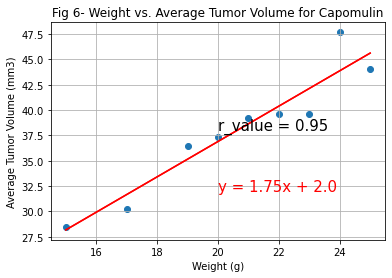

In [78]:
# Calculate the correlation coefficient and linear regression model
#for mouse weight and average tumor volume for the Capomulin regimen

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = merged_df[merged_df["Drug Regimen"] == "Capomulin"]

# Group the data by mouse weight and calculate the mean tumor volume
weight_vs_tumor = capomulin_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# Create a scatter plot of the data
plt.scatter(weight_vs_tumor.index, weight_vs_tumor.values)

# Calculate the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_vs_tumor.index, weight_vs_tumor.values)
regress_values = slope * weight_vs_tumor.index + intercept
plt.plot(weight_vs_tumor.index, regress_values, "r")

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"r_value = {corr_coef}", (20,38),fontsize=15, color="black")

#add equation
plt.plot(weight_vs_tumor.index, regress_values, "r")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")

# Add axis labels and a title
plt.grid(True)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Fig 6- Weight vs. Average Tumor Volume for Capomulin")

plt.show()